<a href="https://colab.research.google.com/github/Lova595/Neural-networks/blob/main/%D0%9DC_%D0%BF%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85_%D1%86%D0%B8%D1%84%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Распознайте рукописную цифру, созданную вами с помощью графического редактора (например, Paint).

Последовательность шагов:
1. В графическом редакторе рисуем произвольную цифру.
2. Сохраняем документ и загружаем его в Colaboratory.
3. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
4. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
5. Выполняем инверсию цветов, нормирование и решейп массива.
6. Выполняем распознавание собственной рукописной цифры.

**Это нейросеть с использованием сверточной сети (CNN) для классификации изображений**

---

Мы имеем датасет изображений рукописных цифр, состоящий из множества изображений, и хотим обучить модель классифицировать каждое изображение на несколько классов: каждую цифру от 0 до 9.

Для начала, мы должны преобразовать наши изображения в числовой формат. Для этого мы будем использовать технику векторизации изображений, где каждый пиксель изображения представляется как число от 0 до 255.

Затем мы построим CNN с несколькими сверточными слоями. Каждый сверточный слой будет применять набор фильтров к каждой части изображения и выдавать карты признаков. Мы используем эти карты признаков для извлечения более абстрактных признаков из изображения.

Затем мы добавим полносвязный слой на выходе, который будет принимать карты признаков и выдавать вероятности для каждого класса в качестве предсказания.

В процессе обучения, модель будет минимизировать функцию потерь (кросс-энтропия) между предсказанными и фактическими вероятностями.

В результате, мы используем обученную модель для классификации новых изображений. Модель будет принимать на вход изображение и выдавать вероятности для каждого класса. Мы можем выбрать класс с наибольшей вероятностью в качестве предсказания для данного изображения.



# Распознавание рукописных цифр MNIST

In [1]:
# @title Подключаем библиотеки

import tensorflow as tf
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
import PIL.ImageOps

#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [2]:
# @title Загружаем свой рисунок в переменную и открываем его на графике

# подгружаем google-диск
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [40]:
# с помощью функции image.load_img загружаем картинку в переменную
numeral = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/IMG_2713.jpeg',
                                                target_size=(28,28), color_mode='grayscale')

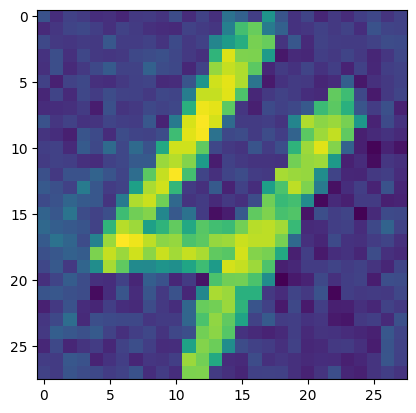

In [41]:
# инвертируем картинку
numeral = PIL.ImageOps.invert(numeral)
plt.imshow(numeral)

In [42]:
num_1 = tf.keras.preprocessing.image.img_to_array(numeral) # переводим картинку в массив numpy
num_1 = np.reshape(num_1, ((28,28))) # после преобразования в массив, делаем решейп в 28х28

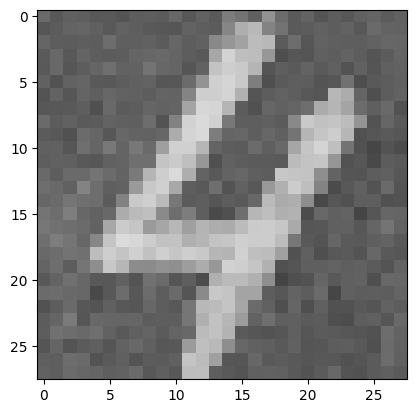

Светлый цвет:  219.0


In [43]:
# выполним инверсию цветов
plt.imshow(Image.fromarray(num_1).convert('RGB'))
plt.show()
print('Светлый цвет: ', np.max(num_1))

In [60]:
# преобразуем изображение в ЧБ
for i in range(28):
  for j in range(28):
    if num_1[i,j] < 102:
      num_1[i,j] = 0
    if num_1[i,j] >= 103:
      num_1[i,j] = 255
  num_2 = num_1

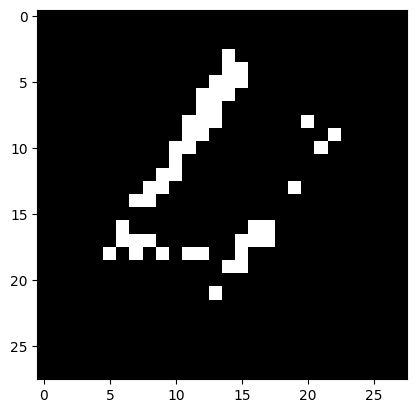

In [61]:
# выполним инверсию цветов
plt.imshow(Image.fromarray(num_2).convert('RGB'))
plt.show()

In [62]:
# нормируем и делаем решейп массива
num_2 = num_2.reshape(784,)
print(num_2.shape)
num2 = num_2.astype('float32') # преобразовываем arr в тип float
num_2 = num_2/255 # делим на 255, чтобы диапазон был от 0 до 1

(784,)


In [69]:
# @title Создадим нейронную сеть на базе MNIST и обучим
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() # загрузка базы MNIST

In [70]:
# Нормирование и преобразование x_train и y_train.
# Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org. reshape(60000,784)
x_test = x_test_org.reshape(10000,784)
# Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [71]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [72]:
# создаем полносвязную сеть
model = Sequential()
model.add(Dense(800, input_dim = 784, activation = 'relu'))
model.add(Dense(400, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [73]:
# компиллируем модель
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary()) # выведем структуру модели

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952410 (3.63 MB)
Trainable params: 952410 (3.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [74]:
# обучение НС
model.fit(x_train, y_train,
          batch_size=128,
          epochs=15,
          verbose=1)

Epoch 1/15
469/469 [==============================] - 16s 31ms/step - loss: 0.2050 - accuracy: 0.9388
Epoch 2/15
469/469 [==============================] - 18s 38ms/step - loss: 0.0756 - accuracy: 0.9765
Epoch 3/15
469/469 [==============================] - 17s 37ms/step - loss: 0.0474 - accuracy: 0.9847
Epoch 4/15
469/469 [==============================] - 20s 43ms/step - loss: 0.0345 - accuracy: 0.9888
Epoch 5/15
469/469 [==============================] - 14s 30ms/step - loss: 0.0256 - accuracy: 0.9915
Epoch 6/15
469/469 [==============================] - 18s 38ms/step - loss: 0.0190 - accuracy: 0.9938
Epoch 7/15
469/469 [==============================] - 14s 30ms/step - loss: 0.0192 - accuracy: 0.9934
Epoch 8/15
469/469 [==============================] - 15s 33ms/step - loss: 0.0159 - accuracy: 0.9946
Epoch 9/15
469/469 [==============================] - 19s 41ms/step - loss: 0.0160 - accuracy: 0.9946
Epoch 10/15
469/469 [==============================] - 21s 46ms/step - loss: 0.013

In [75]:
model.save_weights('model.h1')
model.load_weights('model.h1')

In [76]:
n_rec = num_2 #создадим переменную нашей новой тестовой цифры, которую будем распознавать
n_rec = np.expand_dims(n_rec, axis=0)
print(n_rec.shape)

(1, 784)


In [77]:
# @title Распознаем наш пример
prediction = model.predict(n_rec)
print(prediction) #Выводим результат, это 10 цифр

1/1 [==============================] - 0s 95ms/step
[[3.5264762e-04 7.5767210e-05 3.5733503e-06 3.9983403e-05 6.5799016e-01
  2.9087437e-02 1.4276268e-01 1.4122778e-01 9.4069310e-06 2.8450612e-02]]


In [78]:
sum(prediction[0])

1.0000000430684395

In [79]:
pred = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print('цифра на картинке: ', pred)

цифра на картинке:  4
